In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import final_project.config as c
import final_project.logic.Utils as u
from final_project.models.Trajectory import Trajectory

COLORS = ["#762a83", "#de77ae", "gold", "cyan", "#1b7837"]

In [3]:
# Read data
gt_traj = Trajectory.read_ground_truth()

pnp_cameras = pd.read_pickle(os.path.join(c.DATA_WRITE_PATH, "pnp_cameras.pkl"))
pnp_traj = Trajectory.from_relative_cameras(pnp_cameras)
pnp_dist = pnp_traj.calculate_distance(gt_traj)

ba_cameras = pd.read_pickle(os.path.join(c.DATA_WRITE_PATH, "ba_cameras.pkl"))
ba_traj = Trajectory.from_relative_cameras(ba_cameras)
ba_dist = ba_traj.calculate_distance(gt_traj)

pg_cameras = pd.read_pickle(os.path.join(c.DATA_WRITE_PATH, "pg_cameras.pkl"))
pg_traj = Trajectory.from_relative_cameras(pg_cameras)
gt_keyframes_traj = Trajectory(coords=gt_traj.coordinates[:, pg_cameras.index])
pg_dist = pg_traj.calculate_distance(gt_keyframes_traj)

In [4]:
print("Distance Statistics")
print("\t\tPnP\t\tBA\t\tLC")
print(f"Mean:\t{pnp_dist.mean():.2f}\t{ba_dist.mean():.2f}\t{pg_dist.mean():.2f}")
print(f"Std:\t{pnp_dist.std():.2f}\t{ba_dist.std():.2f}\t{pg_dist.std():.2f}")
print(f"Min:\t{pnp_dist.min():.2f}\t{ba_dist.min():.2f}\t{pg_dist.min():.2f}")
print(f"Max:\t{pnp_dist.max():.2f}\t{ba_dist.max():.2f}\t{pg_dist.max():.2f}")
print(f"Median:\t{np.median(pnp_dist):.2f}\t{np.median(ba_dist):.2f}\t{np.median(pg_dist):.2f}")

Distance Statistics
		PnP		BA		LC
Mean:	20.10	14.04	2.03
Std:	12.26	10.54	0.92
Min:	0.00	0.00	0.00
Max:	43.05	35.93	4.72
Median:	19.96	12.63	2.01


Figure 4

<Figure size 432x288 with 0 Axes>

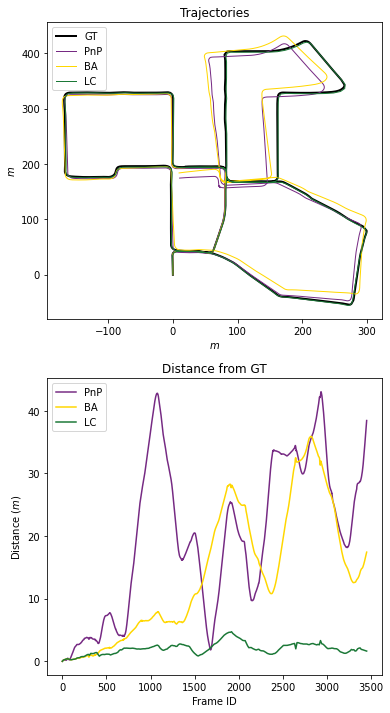

In [5]:
plt.clf()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 12))

axes[0].set_title("Trajectories")
axes[0].plot(gt_traj.X, gt_traj.Z, c='k', linewidth=2, label="GT")
axes[0].plot(pnp_traj.X, pnp_traj.Z, c=COLORS[0], linewidth=1, label="PnP")
axes[0].plot(ba_traj.X, ba_traj.Z, c=COLORS[2], linewidth=1, label="BA")
axes[0].plot(pg_traj.X, pg_traj.Z, c=COLORS[4], linewidth=1, label="LC")
axes[0].set_xlabel("$m$")
axes[0].set_ylabel("$m$")
axes[0].legend()

axes[1].set_title("Distance from GT")
axes[1].plot(pnp_cameras.index, pnp_dist, c=COLORS[0], label="PnP")
axes[1].plot(ba_cameras.index, ba_dist, c=COLORS[2], label="BA")
axes[1].plot(pg_cameras.index, pg_dist, c=COLORS[4], label="LC")
axes[1].set_xlabel("Frame ID")
axes[1].set_ylabel("Distance ($m$)")
axes[1].legend()

plt.show()

Estimated Trajectories

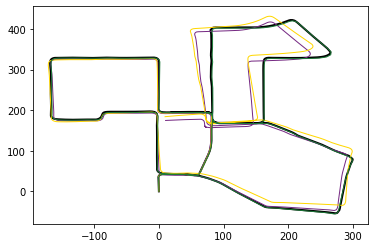

In [6]:
plt.clf()

plt.plot(gt_traj.X, gt_traj.Z, c='k', linewidth=2, label="GT")
plt.plot(pnp_traj.X, pnp_traj.Z, c=COLORS[0], linewidth=1, label="PnP")
plt.plot(ba_traj.X, ba_traj.Z, c=COLORS[2], linewidth=1, label="BA")
plt.plot(pg_traj.X, pg_traj.Z, c=COLORS[4], linewidth=1, label="LC")

plt.show()

Distances from GT

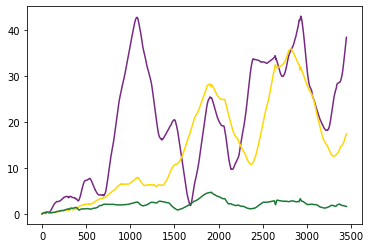

In [7]:
plt.clf()

plt.plot(pnp_cameras.index, pnp_dist, c=COLORS[0], label="PnP")
plt.plot(ba_cameras.index, ba_dist, c=COLORS[2], label="BA")
plt.plot(pg_cameras.index, pg_dist, c=COLORS[4], label="LC")

plt.show()